# <span style="color:red">**Consumption**</span>

### <span style="color:blue">**Introduction to the Uber Dataset**</span>

In [1]:
import pandas as pd
uber_data = pd.read_csv("./uber-raw-data-jul14.csv")

In [2]:
uber_data.head(3)

,Date/Time,Lat,Lon,Base
0,7/1/2014 0:03:00,40.7586,-73.9706,B02512
1,7/1/2014 0:05:00,40.7605,-73.9994,B02512
2,7/1/2014 0:06:00,40.7320,-73.9999,B02512


In [3]:
uber_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 796121 entries, 0 to 796120
Data columns (total 4 columns):
Date/Time    796121 non-null object
Lat          796121 non-null float64
Lon          796121 non-null float64
Base         796121 non-null object
dtypes: float64(2), object(2)
memory usage: 24.3+ MB


##### <span style="color:green">**uber_data.info() reveals that Date/Time column is in string format instead of datetime**</span>

In [4]:
# convert the Date/Time column to datetime
uber_data["Date/Time"] = pd.to_datetime(uber_data["Date/Time"])

In [5]:
# truncate Date/Time into discrete increments --> in this case truncate everything past the hour
uber_data["Date/Time"] = uber_data["Date/Time"].dt.floor("1H")

##### <span style="color:green">**EDA on uber_data**</span>

In [6]:
hourly_data = uber_data["Date/Time"].value_counts().sort_index()
hourly_data.head(10)

2014-07-01 00:00:00     216
2014-07-01 01:00:00     111
2014-07-01 02:00:00      82
2014-07-01 03:00:00     134
2014-07-01 04:00:00     223
2014-07-01 05:00:00     348
2014-07-01 06:00:00     715
2014-07-01 07:00:00    1196
2014-07-01 08:00:00    1076
2014-07-01 09:00:00     885
Name: Date/Time, dtype: int64

In [7]:
import matplotlib.pyplot as plt
hourly_data.plot(kind="line", figsize=(15,10))
plt.show()

<Figure size 1500x1000 with 1 Axes>

In [8]:
hours = uber_data["Date/Time"].dt.hour
week_day = uber_data["Date/Time"].dt.weekday
date = uber_data["Date/Time"].dt.date
weekly_data = pd.concat([week_day, hours, date], axis=1)
weekly_data.columns = ["Week Day", "Hour", "Date"]

In [9]:
weekly_data.head(10)

,Week Day,Hour,Date
0,1,0,2014-07-01
1,1,0,2014-07-01
2,1,0,2014-07-01
3,1,0,2014-07-01
4,1,0,2014-07-01
5,1,0,2014-07-01
6,1,0,2014-07-01
7,1,0,2014-07-01
8,1,1,2014-07-01
9,1,1,2014-07-01


In [10]:
import calendar
weekly_data["Week Day"] = weekly_data["Week Day"].apply(lambda x: calendar.day_name[x])

In [11]:
weekly_data.head(10)

,Week Day,Hour,Date
0,Tuesday,0,2014-07-01
1,Tuesday,0,2014-07-01
2,Tuesday,0,2014-07-01
3,Tuesday,0,2014-07-01
4,Tuesday,0,2014-07-01
5,Tuesday,0,2014-07-01
6,Tuesday,0,2014-07-01
7,Tuesday,0,2014-07-01
8,Tuesday,1,2014-07-01
9,Tuesday,1,2014-07-01


In [12]:
weekly_data = weekly_data.groupby(["Date", "Week Day", "Hour"]).size()

In [13]:
weekly_data.head(10)

Date        Week Day  Hour
2014-07-01  Tuesday   0        216
                      1        111
                      2         82
                      3        134
                      4        223
                      5        348
                      6        715
                      7       1196
                      8       1076
                      9        885
dtype: int64

In [14]:
weekly_data = weekly_data.reset_index()
weekly_data = weekly_data.rename(columns={0: "Size"})

In [15]:
weekly_data.head(10)

,Date,Week Day,Hour,Size
0,2014-07-01,Tuesday,0,216
1,2014-07-01,Tuesday,1,111
2,2014-07-01,Tuesday,2,82
3,2014-07-01,Tuesday,3,134
4,2014-07-01,Tuesday,4,223
5,2014-07-01,Tuesday,5,348
6,2014-07-01,Tuesday,6,715
7,2014-07-01,Tuesday,7,1196
8,2014-07-01,Tuesday,8,1076
9,2014-07-01,Tuesday,9,885


In [16]:
weekly_data = weekly_data.groupby(["Week Day", "Hour"]).mean()["Size"]

In [17]:
weekly_data.head(10)

Week Day  Hour
Friday    0        615.00
          1        385.25
          2        264.75
          3        307.50
          4        339.75
          5        497.25
          6        736.75
          7       1008.00
          8       1038.00
          9        907.75
Name: Size, dtype: float64

In [18]:
weekly_data = weekly_data.unstack(level=0)

In [19]:
weekly_data

Week Day,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
Hour,,,,,,,
0,615.00,315.00,1110.25,1090.00,430.0,301.8,354.6
1,385.25,153.25,788.25,829.50,231.4,155.8,193.2
2,264.75,109.75,580.00,638.25,171.0,111.2,156.0
3,307.50,254.75,426.00,477.00,256.6,187.0,224.0
4,339.75,403.75,271.75,245.50,376.8,296.6,326.0
5,497.25,615.25,274.25,231.25,586.2,546.0,559.8
6,736.75,911.00,303.50,256.75,959.2,962.2,1003.4
7,1008.00,1266.50,398.50,316.25,1341.8,1350.0,1425.8
8,1038.00,1199.25,525.25,466.75,1336.6,1332.4,1425.0


In [20]:
weekly_data = weekly_data.reindex(columns=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])

In [21]:
weekly_data

Week Day,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
Hour,,,,,,,
0,315.00,301.8,354.6,430.0,615.00,1110.25,1090.00
1,153.25,155.8,193.2,231.4,385.25,788.25,829.50
2,109.75,111.2,156.0,171.0,264.75,580.00,638.25
3,254.75,187.0,224.0,256.6,307.50,426.00,477.00
4,403.75,296.6,326.0,376.8,339.75,271.75,245.50
5,615.25,546.0,559.8,586.2,497.25,274.25,231.25
6,911.00,962.2,1003.4,959.2,736.75,303.50,256.75
7,1266.50,1350.0,1425.8,1341.8,1008.00,398.50,316.25
8,1199.25,1332.4,1425.0,1336.6,1038.00,525.25,466.75


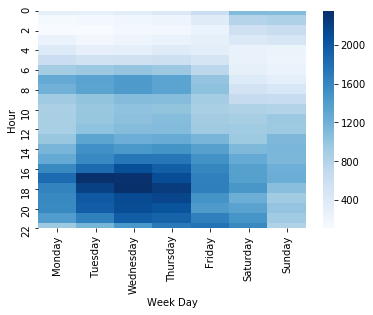

In [25]:
import seaborn as sns
sns.heatmap(weekly_data, cmap="Blues")
plt.show()

### <span style="color:blue">**Points of Interest**</span>

In [28]:
import geopy.distance
metro_art_coordinates = (40.7794, -73.9632)
empire_state_building_coordinates = (40.7484, -73.9857)
distance = geopy.distance.distance(metro_art_coordinates, empire_state_building_coordinates)

In [29]:
distance

Distance(3.9319431838516716)

In [30]:
distance.mi

2.443196223959372

In [32]:
# easy way to convert our uber latitude and longitude data to tuples
location_tuples = uber_data[["Lat", "Lon"]].apply(lambda x: tuple(x), axis=1)

In [33]:
location_tuples

0         (40.7586, -73.9706)
1         (40.7605, -73.9994)
2          (40.732, -73.9999)
3         (40.7635, -73.9793)
4         (40.7204, -74.0047)
                 ...         
796116    (40.7285, -73.9846)
796117    (40.7615, -73.9868)
796118     (40.677, -73.9515)
796119    (40.7225, -74.0038)
796120    (40.7199, -73.9884)
Length: 796121, dtype: object

In [46]:
from math import radians, cos, sin, asin, sqrt

def haversine(coordinates1, coordinates2):
    lon1 = coordinates1[1]
    lat1 = coordinates1[0]
    lon2 = coordinates2[1]
    lat2 = coordinates2[0]
    
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1)*cos(lat2)*sin(dlon/2)**2
    c = 2*asin(sqrt(a))
    r = 3956
    return c * r

In [45]:
print(haversine(metro_art_coordinates, empire_state_building_coordinates))

2.4442300908514785


In [47]:
# calculate distance from uber drop off to Metro Art
uber_data["Distance MM"] = uber_data[["Lat", "Lon"]].apply(lambda x: haversine(metro_art_coordinates, tuple(x)), axis=1)

In [48]:
# calculate distance from uber drop off to Empire State Building
uber_data["Distance ESB"] = uber_data[["Lat", "Lon"]].apply(lambda x: haversine(empire_state_building_coordinates, tuple(x)), axis=1)

In [49]:
uber_data.head(5)

,Date/Time,Lat,Lon,Base,Distance MM,Distance ESB
0,2014-07-01,40.7586,-73.9706,B02512,1.487358,1.058178
1,2014-07-01,40.7605,-73.9994,B02512,2.299140,1.100642
2,2014-07-01,40.7320,-73.9999,B02512,3.794105,1.354266
3,2014-07-01,40.7635,-73.9793,B02512,1.383450,1.094999
4,2014-07-01,40.7204,-74.0047,B02512,4.615925,2.173858


In [50]:
uber_data[["Distance MM", "Distance ESB"]].describe()

,Distance MM,Distance ESB
count,796121.000000,796121.000000
mean,3.868244,2.723783
std,3.200848,3.276343
min,0.037592,0.000000
25%,1.863763,0.976621
50%,3.329218,1.726115
75%,4.691434,3.037256
max,86.770131,88.188585


In [51]:
# using boolean indexing, we can sum to find the count within a specified range
within_quarter_mile = uber_data[["Distance MM", "Distance ESB"]] < 0.25

In [52]:
within_quarter_mile.sum()

Distance MM      2764
Distance ESB    15133
dtype: int64

In [54]:
import numpy as np
distance_range = np.arange(0.1, 5.1, 0.1)
distance_range

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9,
       4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. ])

In [55]:
distance_data = [(uber_data[["Distance MM", "Distance ESB"]] < dist).sum() for dist in distance_range]
distance_data

[Distance MM      575
 Distance ESB    2387
 dtype: int64, Distance MM     1776
 Distance ESB    9661
 dtype: int64, Distance MM      4566
 Distance ESB    22166
 dtype: int64, Distance MM      8783
 Distance ESB    42427
 dtype: int64, Distance MM     13606
 Distance ESB    68011
 dtype: int64, Distance MM     20770
 Distance ESB    92650
 dtype: int64, Distance MM      29408
 Distance ESB    119621
 dtype: int64, Distance MM      38912
 Distance ESB    147815
 dtype: int64, Distance MM      50497
 Distance ESB    177759
 dtype: int64, Distance MM      63072
 Distance ESB    206056
 dtype: int64, Distance MM      75474
 Distance ESB    240003
 dtype: int64, Distance MM      89442
 Distance ESB    277785
 dtype: int64, Distance MM     105692
 Distance ESB    311312
 dtype: int64, Distance MM     123431
 Distance ESB    335385
 dtype: int64, Distance MM     141656
 Distance ESB    355731
 dtype: int64, Distance MM     157194
 Distance ESB    375017
 dtype: int64, Distance MM     174148


In [56]:
distance_data = pd.concat(distance_data, axis=1)
distance_data

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
Distance MM,575,1776,4566,8783,13606,20770,29408,38912,50497,63072,...,512662,529702,546998,563198,575552,588588,597941,614256,621624,626604
Distance ESB,2387,9661,22166,42427,68011,92650,119621,147815,177759,206056,...,656735,661066,665748,670373,674744,678522,682262,685487,688588,691884


In [57]:
distance_data = distance_data.transpose()
distance_data.index = distance_range
distance_data

,Distance MM,Distance ESB
0.1,575,2387
0.2,1776,9661
0.3,4566,22166
0.4,8783,42427
0.5,13606,68011
0.6,20770,92650
0.7,29408,119621
0.8,38912,147815
0.9,50497,177759
1.0,63072,206056


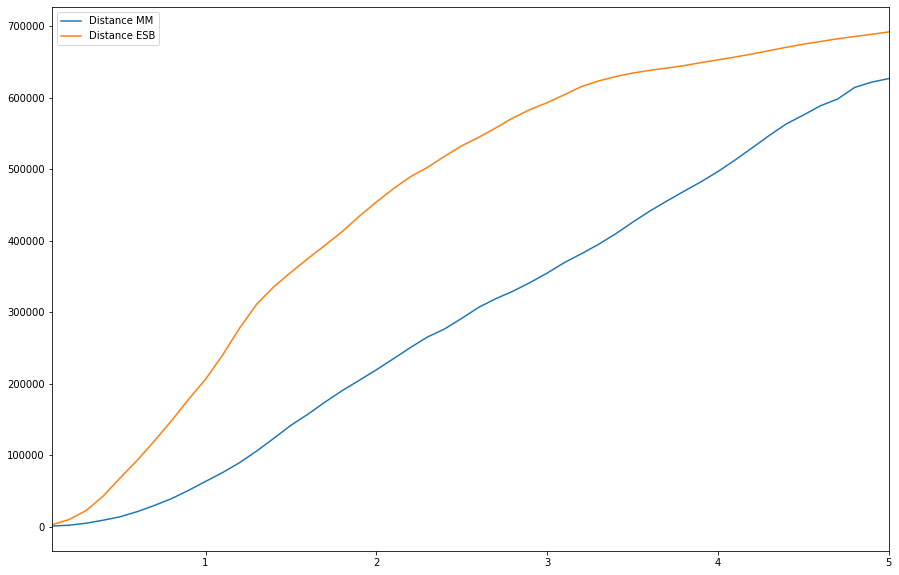

In [58]:
distance_data.plot(kind="line", figsize=(15,10))
plt.show()

### <span style="color:blue">**Mapping Data with Folium**</span>

In [65]:
import folium as folium
lat = uber_data["Lat"].values[:5]
lon = uber_data["Lon"].values[:5]
uber_map = folium.Map(location=[40.7128, -74.0060], zoom_start=12)

for i in range(len(lat)):
    folium.Marker((lat[i], lon[i]), popup="Rider {}".format(i+1)).add_to(uber_map)

uber_map

In [68]:
from folium.plugins import HeatMap
uber_data["Weight"] = 0.5
lat_lon = uber_data[["Lat", "Lon", "Weight"]].values[:10000]
uber_map = folium.Map(location=[40.7128, -74.0060], zoom_start=12)
HeatMap(lat_lon, radium=15).add_to(uber_map)
uber_map

In [71]:
i = uber_data[["Distance MM", "Distance ESB"]] < 0.25

,Distance MM,Distance ESB
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
796116,False,False
796117,False,False
796118,False,False
796119,False,False


In [72]:
i = i.any(axis=1)

In [73]:
map_data = uber_data[i].copy()
map_data

,Date/Time,Lat,Lon,Base,Distance MM,Distance ESB,Weight
5,2014-07-01 00:00:00,40.7487,-73.9869,B02512,2.455439,0.066098,0.5
13,2014-07-01 02:00:00,40.7471,-73.9872,B02512,2.559080,0.119218,0.5
17,2014-07-01 03:00:00,40.7498,-73.9813,B02512,2.252287,0.249626,0.5
31,2014-07-01 05:00:00,40.7489,-73.9874,B02512,2.456893,0.095389,0.5
104,2014-07-01 07:00:00,40.7782,-73.9590,B02512,0.234702,2.486594,0.5
...,...,...,...,...,...,...,...
795863,2014-07-31 13:00:00,40.7463,-73.9888,B02764,2.648655,0.217527,0.5
795910,2014-07-31 15:00:00,40.7460,-73.9864,B02764,2.605797,0.169706,0.5
795925,2014-07-31 16:00:00,40.7449,-73.9866,B02764,2.678014,0.246201,0.5
795940,2014-07-31 16:00:00,40.7501,-73.9825,B02764,2.260816,0.204436,0.5


In [75]:
map_data["Weight"] = 0.1
lat_lon = map_data[["Lat", "Lon", "Weight"]].values
uber_map = folium.Map(location=[40.7728, -74.0060], zoon_start=13)
HeatMap(lat_lon, radium=10).add_to(uber_map)
uber_map

In [77]:
uber_data["Date_Hour"] = uber_data["Date/Time"].apply(lambda x: x.replace(microsecond=0, second=0, minute=0))

0   2014-07-01 00:00:00
1   2014-07-01 00:00:00
2   2014-07-01 00:00:00
3   2014-07-01 00:00:00
4   2014-07-01 00:00:00
5   2014-07-01 00:00:00
6   2014-07-01 00:00:00
7   2014-07-01 00:00:00
8   2014-07-01 01:00:00
9   2014-07-01 01:00:00
Name: Date_Hour, dtype: datetime64[ns]

In [79]:
uber_data["Date_Hour"]

0        2014-07-01 00:00:00
1        2014-07-01 00:00:00
2        2014-07-01 00:00:00
3        2014-07-01 00:00:00
4        2014-07-01 00:00:00
                 ...        
796116   2014-07-31 23:00:00
796117   2014-07-31 23:00:00
796118   2014-07-31 23:00:00
796119   2014-07-31 23:00:00
796120   2014-07-31 23:00:00
Name: Date_Hour, Length: 796121, dtype: datetime64[ns]

In [80]:
from datetime import datetime
map_data = uber_data[uber_data["Date/Time"] < datetime(2014, 7, 8)].copy()
map_data["Weight"] = 0.5

In [81]:
map_data

,Date/Time,Lat,Lon,Base,Distance MM,Distance ESB,Weight,Date_Hour
0,2014-07-01 00:00:00,40.7586,-73.9706,B02512,1.487358,1.058178,0.5,2014-07-01 00:00:00
1,2014-07-01 00:00:00,40.7605,-73.9994,B02512,2.299140,1.100642,0.5,2014-07-01 00:00:00
2,2014-07-01 00:00:00,40.7320,-73.9999,B02512,3.794105,1.354266,0.5,2014-07-01 00:00:00
3,2014-07-01 00:00:00,40.7635,-73.9793,B02512,1.383450,1.094999,0.5,2014-07-01 00:00:00
4,2014-07-01 00:00:00,40.7204,-74.0047,B02512,4.615925,2.173858,0.5,2014-07-01 00:00:00
...,...,...,...,...,...,...,...,...
788940,2014-07-07 22:00:00,40.7553,-73.9790,B02764,1.857823,0.591420,0.5,2014-07-07 22:00:00
788941,2014-07-07 22:00:00,40.7760,-73.9795,B02764,0.883978,1.933035,0.5,2014-07-07 22:00:00
788942,2014-07-07 23:00:00,40.7566,-73.9944,B02764,2.267165,0.726373,0.5,2014-07-07 23:00:00
788943,2014-07-07 23:00:00,40.7490,-73.9760,B02764,2.203125,0.509069,0.5,2014-07-07 23:00:00


In [82]:
map_data = map_data.groupby("Date_Hour").apply(lambda x: x[["Lat", "Lon", "Weight"]].sample(int(len(x) / 3)).values.tolist())

In [84]:
date_hour_index = [x.strftime("%m/%d/%Y, %H:%M:%S") for x in map_data.index]
date_hour_index

['07/01/2014, 00:00:00',
 '07/01/2014, 01:00:00',
 '07/01/2014, 02:00:00',
 '07/01/2014, 03:00:00',
 '07/01/2014, 04:00:00',
 '07/01/2014, 05:00:00',
 '07/01/2014, 06:00:00',
 '07/01/2014, 07:00:00',
 '07/01/2014, 08:00:00',
 '07/01/2014, 09:00:00',
 '07/01/2014, 10:00:00',
 '07/01/2014, 11:00:00',
 '07/01/2014, 12:00:00',
 '07/01/2014, 13:00:00',
 '07/01/2014, 14:00:00',
 '07/01/2014, 15:00:00',
 '07/01/2014, 16:00:00',
 '07/01/2014, 17:00:00',
 '07/01/2014, 18:00:00',
 '07/01/2014, 19:00:00',
 '07/01/2014, 20:00:00',
 '07/01/2014, 21:00:00',
 '07/01/2014, 22:00:00',
 '07/01/2014, 23:00:00',
 '07/02/2014, 00:00:00',
 '07/02/2014, 01:00:00',
 '07/02/2014, 02:00:00',
 '07/02/2014, 03:00:00',
 '07/02/2014, 04:00:00',
 '07/02/2014, 05:00:00',
 '07/02/2014, 06:00:00',
 '07/02/2014, 07:00:00',
 '07/02/2014, 08:00:00',
 '07/02/2014, 09:00:00',
 '07/02/2014, 10:00:00',
 '07/02/2014, 11:00:00',
 '07/02/2014, 12:00:00',
 '07/02/2014, 13:00:00',
 '07/02/2014, 14:00:00',
 '07/02/2014, 15:00:00',


In [85]:
date_hour_data = map_data.tolist()

In [86]:
date_hour_data

[[[40.744, -73.9905, 0.5],
  [40.7654, -73.9758, 0.5],
  [40.7585, -73.9703, 0.5],
  [40.7166, -74.0001, 0.5],
  [40.7369, -73.9887, 0.5],
  [40.7455, -73.9951, 0.5],
  [40.7224, -74.0038, 0.5],
  [40.7611, -73.9787, 0.5],
  [40.7444, -73.9961, 0.5],
  [40.6911, -73.9029, 0.5],
  [40.7366, -73.9554, 0.5],
  [40.76, -73.9805, 0.5],
  [40.6517, -73.949, 0.5],
  [40.7358, -74.0006, 0.5],
  [40.728, -74.0053, 0.5],
  [40.722, -73.9873, 0.5],
  [40.7748, -73.991, 0.5],
  [40.7056, -74.0045, 0.5],
  [40.8116, -73.9446, 0.5],
  [40.7443, -74.0068, 0.5],
  [40.7295, -73.984, 0.5],
  [40.7416, -74.0069, 0.5],
  [40.764, -73.9865, 0.5],
  [40.7664, -73.9663, 0.5],
  [40.7319, -74.0011, 0.5],
  [40.7526, -73.9673, 0.5],
  [40.6951, -74.1782, 0.5],
  [40.764, -73.9731, 0.5],
  [40.7272, -74.0317, 0.5],
  [40.7511, -74.006, 0.5],
  [40.7148, -74.0079, 0.5],
  [40.7436, -73.9985, 0.5],
  [40.7603, -73.9813, 0.5],
  [40.7726, -73.9462, 0.5],
  [40.7768, -73.9795, 0.5],
  [40.7608, -73.9792, 0.5],
  [

### <span style="color:blue">**Testing Seasonality**</span>

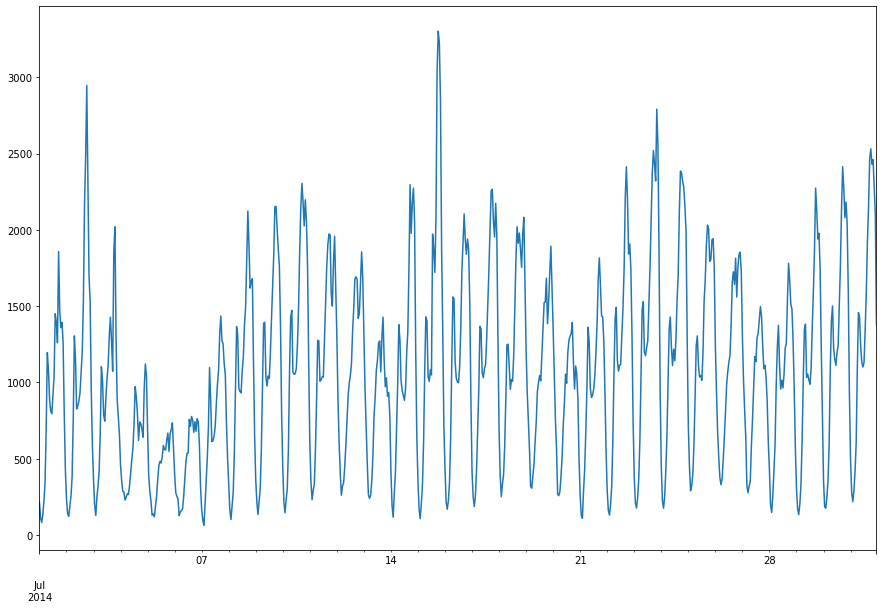

In [90]:
hourly_data.plot(kind="line", figsize=(15,10))
plt.show()

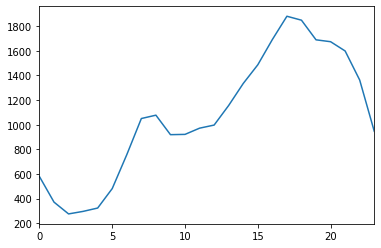

In [91]:
h = hourly_data.groupby(hourly_data.index.hour).mean()
h.plot(kind="line")
plt.show()

In [95]:
i = hourly_data.index.weekday <= 4
h_week = hourly_data.loc[i].groupby(hourly_data.loc[i].index.hour).mean()
h_weekend = hourly_data.loc[~i].groupby(hourly_data.loc[~i].index.hour).mean()
h = pd.concat([h_week, h_weekend], axis=1)
h.columns = ["Weekday", "Weekend"]
h

,Weekday,Weekend
0,397.913043,1100.125
1,219.826087,808.875
2,160.391304,609.125
3,242.913043,451.500
4,346.565217,258.625
5,561.304348,252.750
6,922.391304,280.125
7,1290.695652,357.375
8,1279.086957,496.000
9,1008.173913,662.250


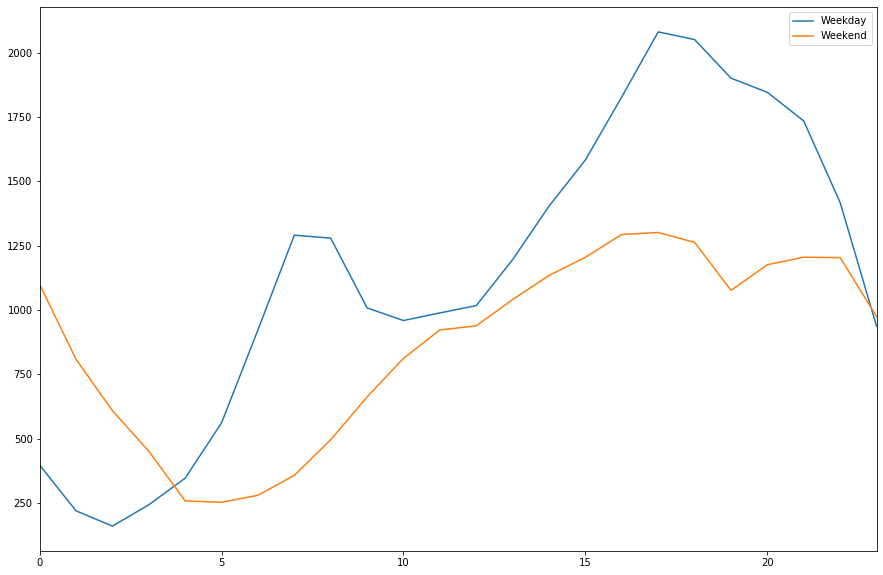

In [97]:
h.plot(kind="line", figsize=(15,10))
plt.show()

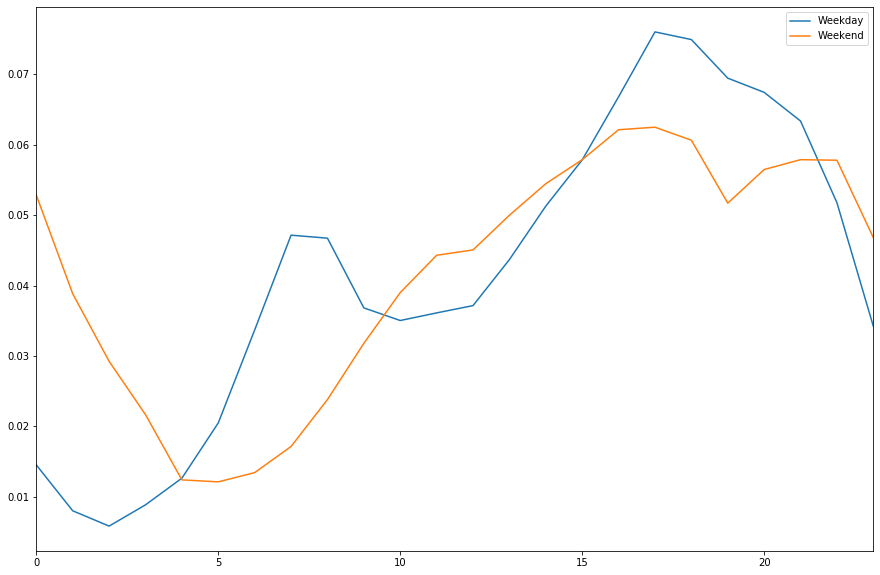

In [98]:
(h / h.sum()).plot(kind="line", figsize=(15,10))
plt.show()

In [99]:
from scipy.stats import ttest_ind
print(ttest_ind([100, 105, 110], [200, 230, 210]))

Ttest_indResult(statistic=-11.67434463174037, pvalue=0.0003078015152715608)


In [100]:
hourly_data_pct = hourly_data.groupby(hourly_data.index.date).apply(lambda x: x/x.sum())
hourly_data_pct

2014-07-01 00:00:00    0.010175
2014-07-01 01:00:00    0.005229
2014-07-01 02:00:00    0.003863
2014-07-01 03:00:00    0.006312
2014-07-01 04:00:00    0.010505
                         ...   
2014-07-31 19:00:00    0.072449
2014-07-31 20:00:00    0.073343
2014-07-31 21:00:00    0.067827
2014-07-31 22:00:00    0.062580
2014-07-31 23:00:00    0.041203
Name: Date/Time, Length: 744, dtype: float64

In [101]:
t_stats = hourly_data_pct.groupby(hourly_data_pct.index.hour).apply(lambda x: ttest_ind(x[x.index.weekday <= 4], x[x.index.weekday > 4])[0])
t_stats

0    -13.172607
1    -12.855798
2    -13.484048
3     -9.418578
4      0.606973
5      6.839349
6     11.710600
7     10.318852
8      9.528385
9      3.162258
10    -4.173500
11    -5.636194
12    -3.781312
13    -2.184142
14    -1.460863
15    -0.043964
16     1.724801
17     3.515413
18     3.244416
19     4.183996
20     2.624601
21     1.428450
22    -1.055840
23    -1.616064
Name: Date/Time, dtype: float64

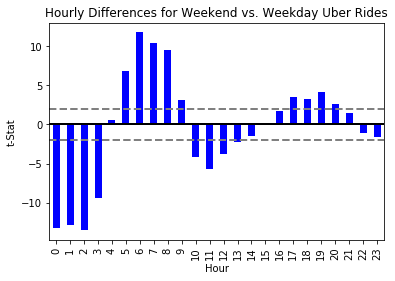

In [103]:
ax = t_stats.plot(kind="bar", color="blue")
ax.axhline(1.96, linestyle="--", color="grey", linewidth=2)
ax.axhline(0, color="black", linewidth=2)
ax.axhline(-1.96, linestyle="--", color="grey", linewidth=2)
plt.xlabel("Hour")
plt.ylabel("t-Stat")
plt.title("Hourly Differences for Weekend vs. Weekday Uber Rides")
plt.show()